In [26]:
import os
import cv2
import numpy as np
# tqdm progress bar için kullanılan bir module
from tqdm import tqdm

# set to true to one once, then back to false unless you want to change something in your training data.
REBUILD_DATA = True

In [33]:
class DogVSCat():
    # all images are different size ,so we should resize them befero the cnn
    IMG_SIZE = 50
    CATS = "PetImages/Cat"
    DOGS = "PetImages/Dog"
    TESTING = "PetImages/Testing"
    LABELS = {CATS: 0, DOGS: 1}
    training_data = []
    
    catcount = 0
    dogcount = 0  
     
    def make_training_data(self):
        
        for label in self.LABELS:
            print("labels : " + str(label))
            for f in tqdm(os.listdir(label)):
                try:
                    path = os.path.join(label, f)
                    # kedi ve köpekleri ayırt etmede renk farklı çokda önemli değildir. Ana nokta bu işte 
                    # patterns ler bu sebeple imajları gray scale olarak çeviriyoruz
                    img = cv2.imread(path, cv2.IMREAD_GRAYSCALE)
                    # resize the all images in 50*50
                    img = cv2.resize(img, (self.IMG_SIZE, self.IMG_SIZE))
                    # işlemden geçmiş tüm img leri training_data listesine appand edeceğiz
                    self.training_data.append([np.array(img), np.eye(2)[self.LABELS[label]] ])

                    if label == self.CATS:
                        self.catcount += 1
                    elif label == self.DOGS:
                        self.dogcount += 1
                                               
                except Exception as e:
                    pass
                    #print(str(e))
                                             
        np.random.shuffle(self.training_data)
        np.save("training_data.npy", self.training_data)
        print('Cats:',self.catcount)
        print('Dogs:',self.dogcount)  
                                               
if REBUILD_DATA:
    dogvscat = DogVSCat()
    dogvscat.make_training_data()

  1%|          | 99/12501 [00:00<00:12, 988.54it/s]

labels : PetImages/Cat


  1%|          | 83/12501 [00:00<00:15, 820.62it/s]

labels : PetImages/Dog


100%|██████████| 12501/12501 [00:13<00:00, 943.87it/s]


Cats: 12476
Dogs: 12470


In [34]:
training_data = np.load("training_data.npy",allow_pickle=True)
print(len(training_data))

print(training_data)

24946
[[array([[ 74,  19, 112, ...,  29,  24, 135],
       [ 70,  85,  45, ...,  31,  28, 146],
       [ 59,  38,  68, ...,  28,  41, 145],
       ...,
       [191, 199, 199, ..., 132, 151, 129],
       [213, 208, 216, ..., 126, 133, 131],
       [209, 218, 201, ..., 131, 133, 129]], dtype=uint8)
  array([0., 1.])]
 [array([[ 28,  32,  26, ...,  49,  51,  52],
       [ 24,  25,  28, ...,  54,  63,  53],
       [ 31,  25,  26, ...,  50,  55,  65],
       ...,
       [ 79,  88,  81, ...,  87,  88,  92],
       [ 85,  81,  70, ..., 109, 116, 118],
       [ 87,  85,  72, ..., 111, 123, 112]], dtype=uint8)
  array([0., 1.])]
 [array([[107, 104, 105, ...,  83,  88,  89],
       [115, 108, 109, ...,  90, 109, 106],
       [103, 100, 123, ...,  70,  83,  92],
       ...,
       [ 89,  84,  85, ...,  86,  89,  62],
       [ 86,  83,  80, ...,  61,  39,  40],
       [ 79,  80,  79, ...,  52,  78,  33]], dtype=uint8)
  array([0., 1.])]
 ...
 [array([[174, 177, 179, ..., 133, 131, 130],
       [17

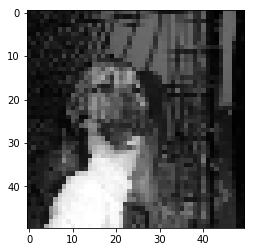

[0. 1.]


In [58]:
import matplotlib.pyplot as plt

plt.imshow(training_data[18000,0], cmap="gray")
plt.show()

print(training_data[18000,1])

In [62]:
import torch

X = torch.Tensor([i[0] for i in training_data]).view(-1,50,50)
X = X / 255.0

y = torch.Tensor([i[1] for i in training_data])

print(y)

tensor([[0., 1.],
        [0., 1.],
        [0., 1.],
        ...,
        [0., 1.],
        [1., 0.],
        [0., 1.]])
